In [1]:
import numpy as np
import pandas as pd
import kmeans as km
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as kmeans
from scipy.stats import multivariate_normal as mv
from rpy2.robjects.packages import importr

In [2]:
mlbench = importr('mlbench')
spiral = mlbench.mlbench_spirals(1000, sd=0.05)
spiral_data = np.array(spiral[0])
spiral_class = np.array(spiral[1])
spiral_class = spiral_class.reshape(-1,1)

In [3]:
clusters = 30

spiral_kmeans = kmeans(clusters, max_iter=100).fit(spiral_data)
labels = spiral_kmeans.labels_.reshape(-1 ,1)
centers = spiral_kmeans.cluster_centers_
data = np.append(spiral_data, spiral_class, 1)
data = np.append(data, labels, 1)

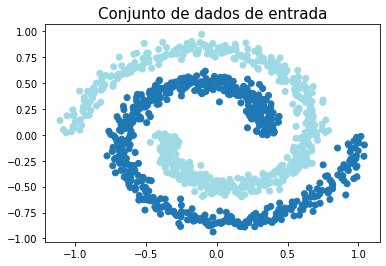

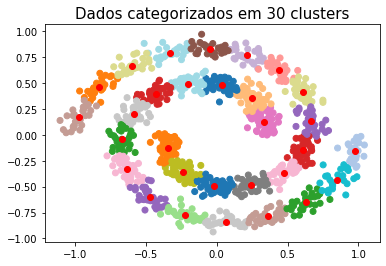

In [4]:
plt.scatter(spiral_data[:,0], spiral_data[:,1], c=spiral_class,  cmap='tab20')
plt.title(f'Conjunto de dados de entrada', size = 15)
plt.show()

plt.title(f'Dados categorizados em {clusters} clusters', size = 15)
plt.scatter(spiral_data[:,0], spiral_data[:,1], c=labels, cmap='tab20')
plt.scatter(centers[:, 0], centers[:, 1], color = 'red' )
plt.show()

In [5]:
def train_f(data, clusters):
    mean = np.zeros((clusters, 2))
    sd = np.zeros((clusters, 2, 2))
    for cluster in range(clusters):
        temp = data[data[:,-1] == cluster, :2]
        mean[cluster] = np.mean(temp, axis=0)
        np.fill_diagonal(sd[cluster], np.std(temp, axis=0))

    numclass1 = len(data[data[:, -2]==1])
    numclass2 = len(data[data[:, -2]==2])
    numclass =[numclass1, numclass2]
    return (sd, mean, numclass)

def classify(point, data, sd, mean, numclass):  
    p = [[],[]]
    inclass1 = data[data[:, -2] == 1]
    inclass2 = data[data[:, -2] == 2]
    inclass = [inclass1, inclass2]
    for classes in (0, 1): 
        clas_mat = inclass[classes]
        for cluster in range(clusters):
            rv = mv(mean[cluster], sd [cluster])
            num_cluster = len(clas_mat[clas_mat[:, -1]==cluster])
            prob = num_cluster/numclass[classes]*rv.pdf([point])
            p[classes].append(prob)

    p1 = sum(p[0])*numclass[0]/(sum(numclass))
    p2 = sum(p[1])*numclass[1]/(sum(numclass))

    return np.where(p1>p2, 1, 2)

In [6]:
x, y = np.mgrid[-1.1:1.1:.05, -1.1:1.1:.05]
pos = np.dstack((x, y))

In [7]:
sd, mean, numclass = train_f(data, clusters)

In [8]:
separador = []
for point in pos.reshape(-1,2):
    separador.append(classify(point, data, sd, mean, numclass))


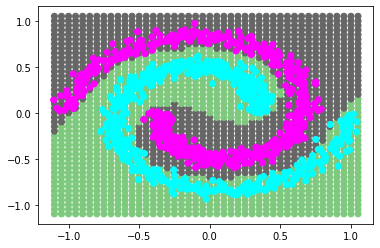

In [9]:
pos = pos.reshape(-1, 2)
plt.scatter(pos[:, 0], pos[:, 1], c=separador, cmap = 'Accent')
plt.scatter(data[:,0], data[:,1], c=data[:,-2],  cmap='cool')
plt.show()

In [55]:
from copy import copy
folds = 2
np.random.shuffle(data)
k_arrays = np.array_split(data, 10)
wrong = []
right = []
for i in range(len(k_arrays)):
    train_arrays = copy(k_arrays)
    test_array = train_arrays.pop(i)
    train_arrays = np.concatenate(train_arrays)
    sd, mean, numclass = train_f(data, clusters)
    in_class = []
    for point in test_array[:, :2]:
        in_class.append(classify(point, train_arrays, sd, mean, numclass))
    accuracy = np.where(in_class == test_array[:, 2], 1, 0)
    right.append((np.count_nonzero(accuracy))/len(test_array)*100)
    wrong.append((len(test_array)- right[i])/len(test_array)*100)

In [58]:
print(np.mean(right))

99.3
